# GIS Y DATOS ESPACIALES

**Análisis Espacial** son un conjunto de herramientas que nos permiten analizar datos geográficos.
Ahora bien, ¿Qué son los **datos geográficos**? Son datos que de manera implícita o explícita tienen una ubicación en la tierra.

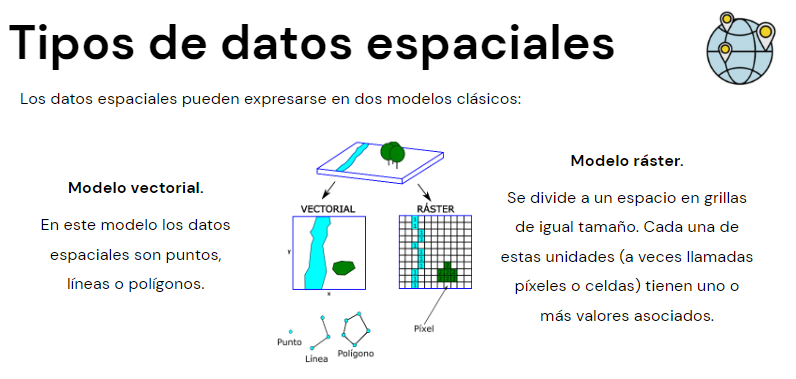


===== ARCHIVOS DE DATOS ESPACIALES =====

* **Shapefile**: De los formatos más ampliamente difundidos. Están compuestos por más de un archivo y es propiedad de ESRI (creadores de ArcGis).
* **Geojson**: Son listas basadas en el standard JSON. Por definición desde ya hace unos años es obligatorio usar la proyección WGS84.
* **KLM**: Son etiquetas basadas en XML Modelo ráster.



In [33]:
import pandas as pd
import seaborn as sns
import numpy as np

## Animaciones

In [34]:
import matplotlib.pyplot as plt
from matplotlib import animation as anim

In [16]:
# Leer el archivo: producto interno bruto per capita
gapminder = pd.read_csv("https://raw.githubusercontent.com/OHI-Science/data-science-training/master/data/gapminder.csv")
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [17]:
# Modificar el dataset: crea nuevas columnas con los valores de log
gapminder = gapminder.assign(
  log_gdp = lambda df: np.log(df["gdpPercap"]),
  log_pop = lambda df: np.log(df["pop"]),
  decade = lambda df: np.floor(df["year"] / 10) * 10  # floor redonde hacia abajo
)
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap,log_gdp,log_pop,decade
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,6.658583,15.946754,1950.0
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,6.710344,16.039154,1950.0
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,6.748878,16.144454,1960.0
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,6.728864,16.261154,1960.0
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,6.606625,16.386554,1970.0


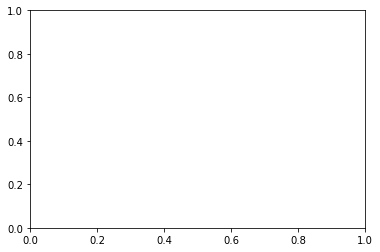

In [21]:
# Paises a graficar
paises_plot = ['Spain', 'Italy', 'United States']
linea_plot = gapminder.loc[gapminder['country'].isin(paises_plot), :]  # filtrar los paises en paises_plot

# Definir los colores
colors = ['red', 'green', 'blue']

# Definir la figura
fig, ax = plt.subplots()

def update_linechart(i):
  for j in range(len(colors)):
    country = paises_plot[j]
    color = colors[j]
    data = linea_plot.loc[linea_plot['country'] == country, :]
    ax.plot(data.year[:i], data.gdpPercap[:i], color)

In [28]:
num_frames = len(linea_plot['year'].unique())        
animacion = anim.FuncAnimation(fig, update_linechart, frames=num_frames)
#Interval=  Delay between frames in milliseconds.
# guardar la animacion en la ruta dada
plt.show(animacion)

In [31]:
# video de html para ver la animacion
from IPython.display import HTML
HTML(animacion.to_html5_video())

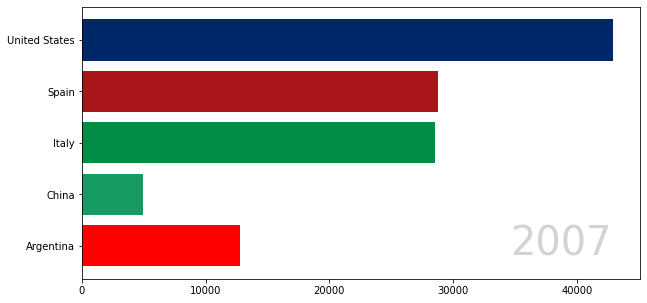

In [ ]:
paises_plot = ['Spain', 'Italy', 'United States', 'Argentina', 'China']
barchart_data  = gapminder.loc[gapminder['country'].isin(paises_plot), :]

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

colors =['#FF0000','#169b62','#008c45','#aa151b','#002868']

data_temp = barchart_data.loc[barchart_data['year'] == 2007, :]

fig, ax = plt.subplots(figsize=(10, 5))
ax.clear()
ax.barh(data_temp.country,data_temp.gdpPercap, color = colors)

ax.text(0.95, 0.2, data_temp['year'].iloc[0],
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,
       fontdict=font)
plt.show()

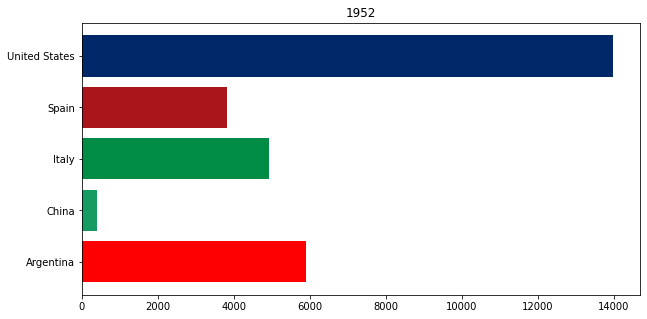

In [ ]:
paises_plot = ['Spain', 'Italy', 'United States', 'Argentina', 'China']
barchart_data  = gapminder.loc[gapminder['country'].isin(paises_plot), :]

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

years = barchart_data['year'].unique()
colors =['#FF0000','#169b62','#008c45','#aa151b','#002868']

fig, ax = plt.subplots(figsize=(10, 5))
label = ax.text(0.95, 0.2, years[0],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

def update_barchart(i):
  year = years[i]
  data_temp = barchart_data.loc[barchart_data['year'] == year, :]
  ax.clear()
  ax.barh(data_temp.country,data_temp.gdpPercap, color = colors)
  label.set_text(year)
  ax.set_title(str(year))

animacion = animation.FuncAnimation(fig, update_barchart, frames = len(years),interval = 1000)
#anim.save('barchart.gif')  

In [ ]:
from IPython.display import HTML
HTML(animacion.to_html5_video())

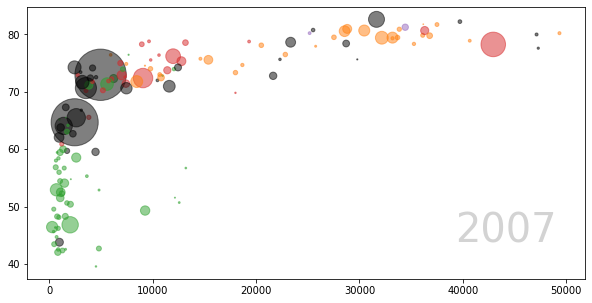

In [ ]:
import numpy as np
import matplotlib

fig, ax = plt.subplots(figsize=(10, 5))

scatter_data = gapminder.copy()

# Colores de acuerdo a la condicion
conditions = [
  scatter_data.continent == 'Asia',
  scatter_data.continent == 'Europe',
  scatter_data.continent == 'Africa',
  scatter_data.continent == 'Americas',
  scatter_data.continent == 'Oceania',
]

values = list(range(5))

scatter_data['color'] = np.select(conditions, values)


font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

years = scatter_data['year'].unique()

data_temp = scatter_data.loc[scatter_data['year'] == years[-1], :]
label = ax.text(0.95, 0.25, years[-1],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

colors =[f'C{i}' for i in np.arange(1, 6)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(1, 5+2), colors)

scatter = ax.scatter(data_temp.gdpPercap,
                     data_temp.lifeExp,
                     s=data_temp['pop']/500000, 
                     alpha = 0.5, 
                     c=data_temp.color, 
                     cmap=cmap,
                     norm=norm)
label.set_text(years[-1])
plt.show()

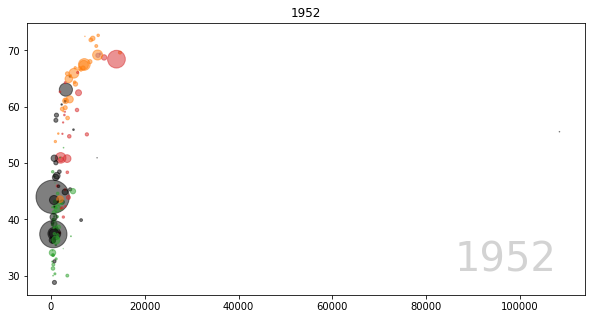

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

years = scatter_data['year'].unique()

colors =[f'C{i}' for i in np.arange(1, 6)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(1, 5+2), colors)


label = ax.text(0.95, 0.25, years[0],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)


def update_scatter(i):
    year = years[i]
    data_temp = scatter_data.loc[scatter_data['year'] == year, :]
    ax.clear()
    label = ax.text(0.95, 0.20, years[i],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
    ax.scatter(
        data_temp['gdpPercap'],
        data_temp['lifeExp'],
        s=data_temp['pop']/500000, 
        alpha = 0.5, 
        c=data_temp.color, 
        cmap=cmap,
        norm=norm
    )
    ax.set_title(str(year))

    label.set_text(year)

anim = animation.FuncAnimation(fig, update_scatter, frames = len(years), interval = 1000)
#anim.save('scatter.gif')  

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())

## Plotly

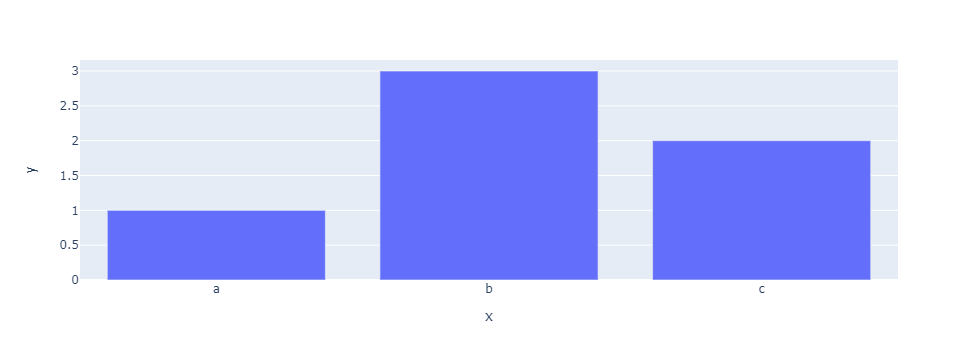

In [37]:
import plotly.express as px

fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [32]:
!pip install chart_studio

In [41]:
# Importar librerias
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
#from plotly.offline import download_plotlyjs, init_notebook_mode,plot,plot, iplot
#init_notebook_mode(connected=True)

### Elementos basicos

In [38]:
arr = np.random.randn(50,4)
df = pd.DataFrame(arr, columns=['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
0,1.861584,-0.339824,0.707544,0.224419
1,1.285447,0.142804,0.399911,0.573469
2,0.351538,-0.302342,0.367349,-1.426084
3,-0.905963,-1.609928,-1.315315,0.712620
4,-0.226812,-0.905063,1.358249,0.220906


<AxesSubplot:>

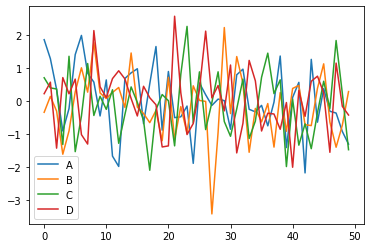

In [39]:
df.plot()

In [43]:
# Informacion de datos disponibles: https://plotly.com/python-api-reference/generated/plotly.data.html
# Precio de stocks de ['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'] para 2018/2019
df_stocks = px.data.stocks()
df_stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


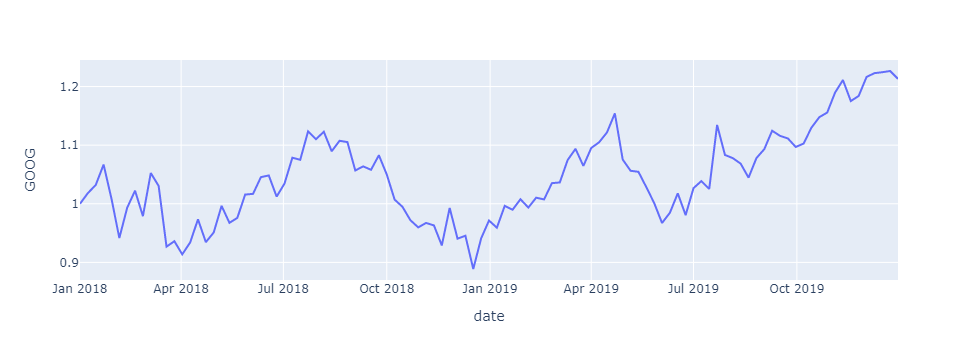

In [44]:
px.line(df_stocks, x='date', y='GOOG', labels={'x':'Fecha', 'y':'Precio'})

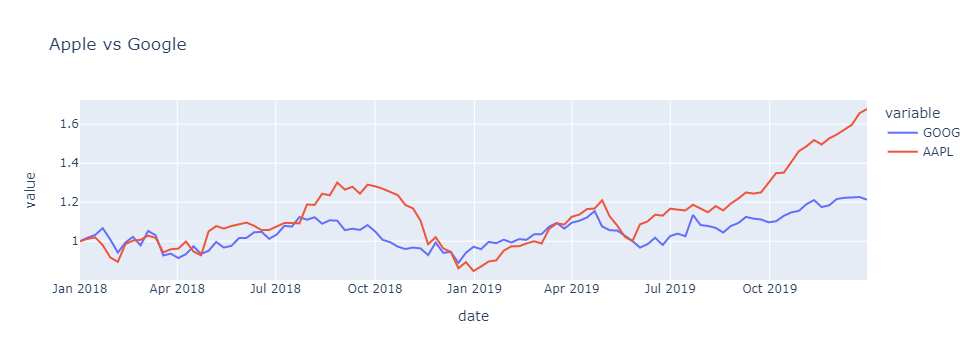

In [45]:
px.line(df_stocks, x='date', y=['GOOG','AAPL'], labels={'x':'Date', 'y':'Price'},
        title='Apple vs Google')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL,
                         mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN,
                         mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG,
                         mode='lines+markers', name='Google',
                         line=dict(color='firebrick',width=2,
                                   dash='dashdot')))
fig.update_layout(title='Precio de acciones 2018/19',
                  xaxis_title='Precio',yaxis_title='Fecha')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL,
                         mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN,
                         mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG,
                         mode='lines+markers', name='Google',
                         line=dict(color='firebrick',width=2,
                                   dash='dashdot')))
fig.update_layout(
    xaxis=dict(showline=True, showgrid=False, showticklabels=True,
               linecolor='rgb(204,204,204)', linewidth=2, ticks='outside',
               tickfont=dict(family='Arial', size=12, color='rgb(82,82,82)')
               ),
               yaxis=dict(showgrid=False, zeroline=False, showline=False,
                          showticklabels=False                   
               ),
               autosize=False,
               margin=dict(
                   autoexpand=False,l=100, r=20, t=110),
                           showlegend=True, plot_bgcolor='white'
        )

## Bar charts

In [46]:
df_us = px.data.gapminder().query("country=='United States'")
df_us.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1608,United States,Americas,1952,68.44,157553000,13990.48208,USA,840
1609,United States,Americas,1957,69.49,171984000,14847.12712,USA,840
1610,United States,Americas,1962,70.21,186538000,16173.14586,USA,840
1611,United States,Americas,1967,70.76,198712000,19530.36557,USA,840
1612,United States,Americas,1972,71.34,209896000,21806.03594,USA,840


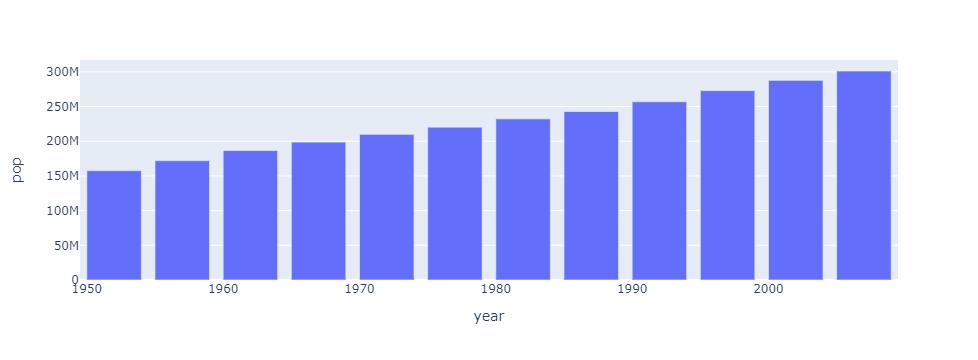

In [47]:
px.bar(df_us, x='year', y='pop')

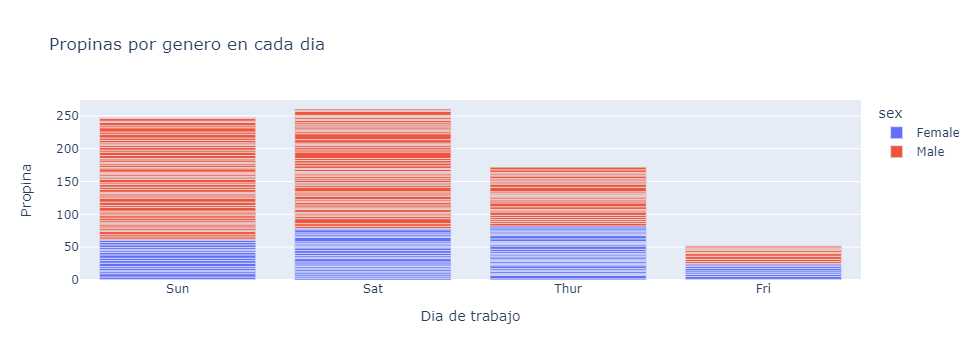

In [48]:
df_tips= px.data.tips()
px.bar(df_tips, x='day',y='tip',color='sex',
       title='Propinas por genero en cada dia',
       labels={'tip':'Propina', 'day':'Dia de trabajo'})

In [ ]:
df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df_europe, y='pop', x='country', text='pop', color='country')
fig.update_traces(texttemplate= '%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle= -45)
fig

## Scatterplot

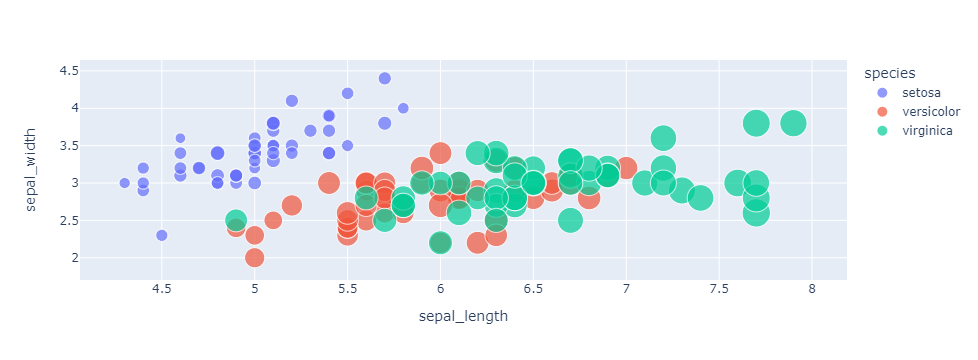

In [51]:
df_iris= px.data.iris()
px.scatter(df_iris, x='sepal_length', y='sepal_width', color='species', size='petal_length')

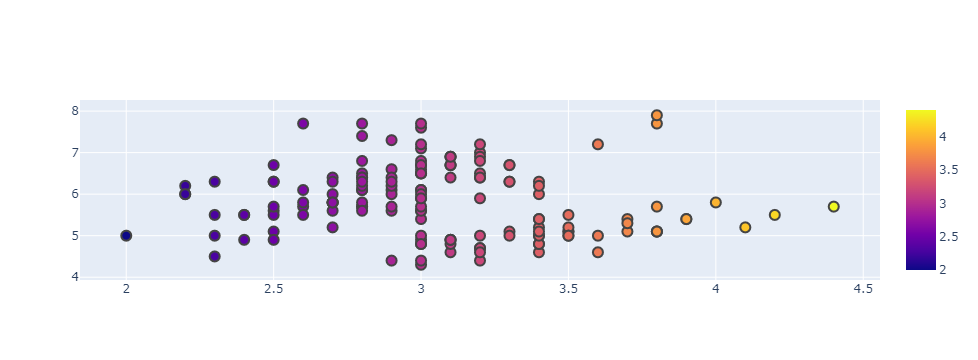

In [53]:
fig = go.Figure()
fig.add_trace(go.Scatter(
  x=df_iris.sepal_width, y= df_iris.sepal_length, mode='markers',
  marker_color=df_iris.sepal_width, text=df_iris.species, marker=dict(showscale=True)
))
fig.update_traces(marker_line_width= 2, marker_size=10)

## Piecharts

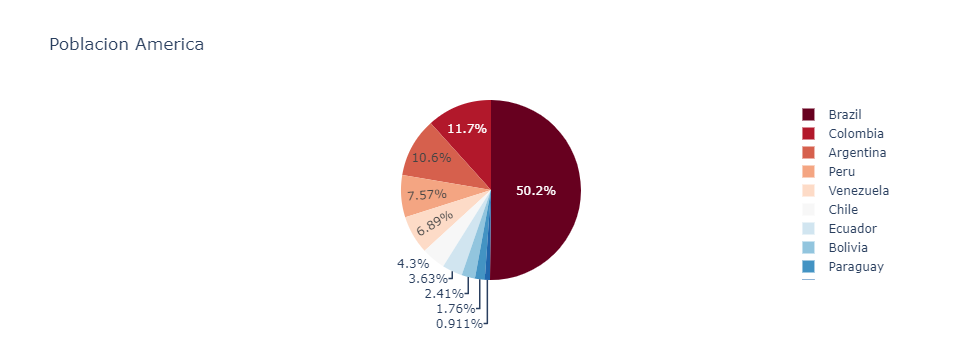

In [54]:
df_america = px.data.gapminder().query("year==2007").query("continent= ='Americas' and (country in ('Colombia','Uruguay','Argentina','Peru','Chile','Brazil','Ecuador','Venezuela','Paraguay','Bolivia'))")
px.pie(df_america, values='pop', names='country', title='Poblacion America',
       color_discrete_sequence= px.colors.sequential.RdBu)

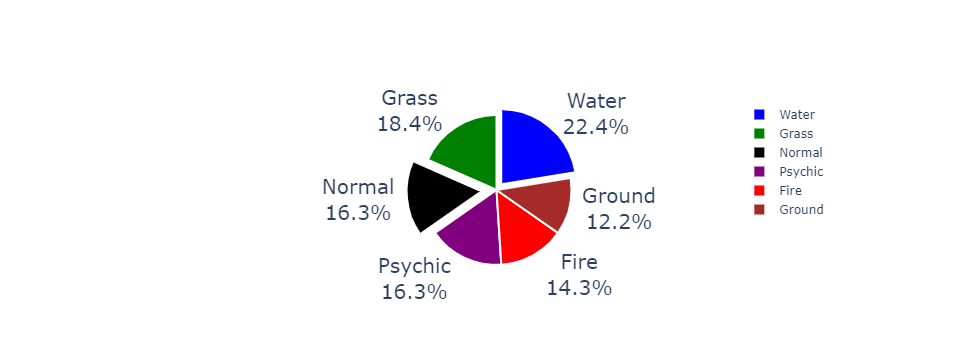

In [55]:
colors=['blue','green','black','purple','red','brown']

fig = go.Figure(data=[go.Pie(labels=['Water','Grass','Normal', 'Psychic','Fire','Ground'],
                            values=[110,90,80,80,70,60])])
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  textinfo= 'label+percent',pull=[0.1, 0, 0.2, 0, 0, 0],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF',
                                                       width=2)))

## Histogramas

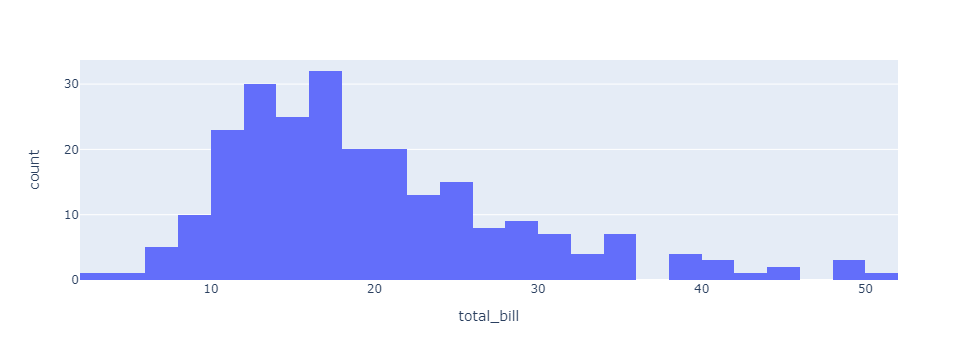

In [49]:
df_tips= px.data.tips()
px.histogram(df_tips, x='total_bill')

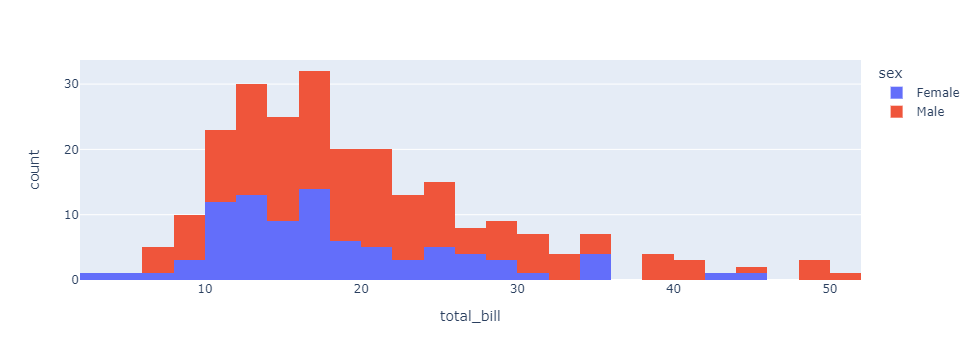

In [50]:
px.histogram(df_tips, x='total_bill', color='sex')

## Boxplots

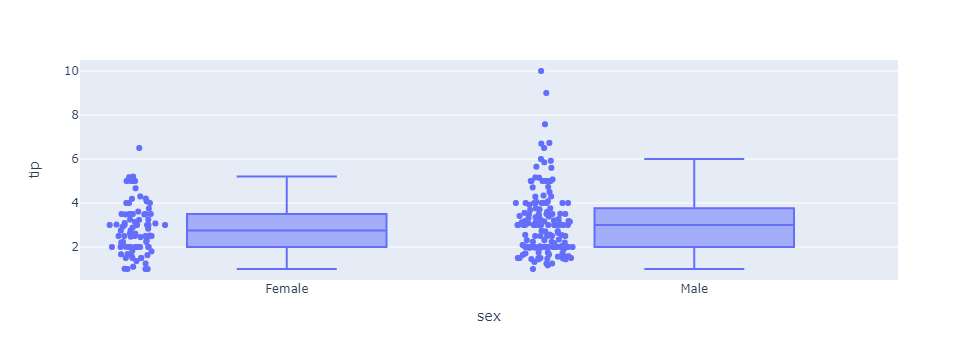

In [56]:
df_tips= px.data.tips()
px.box(df_tips, x='sex', y='tip', points='all')

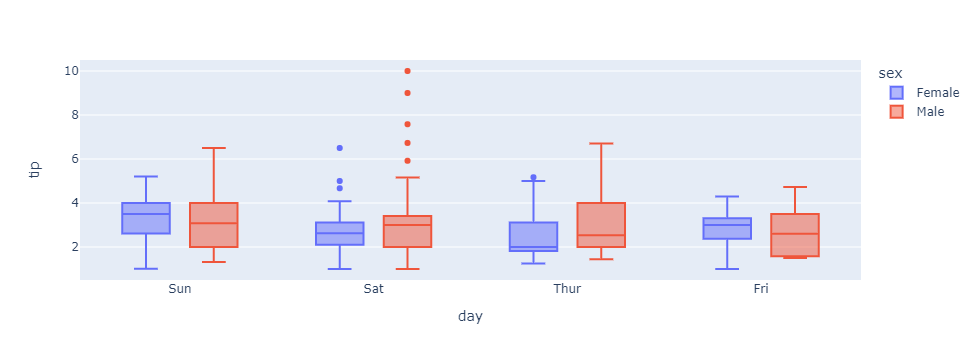

In [57]:
px.box(df_tips, x='day', y='tip', color='sex')

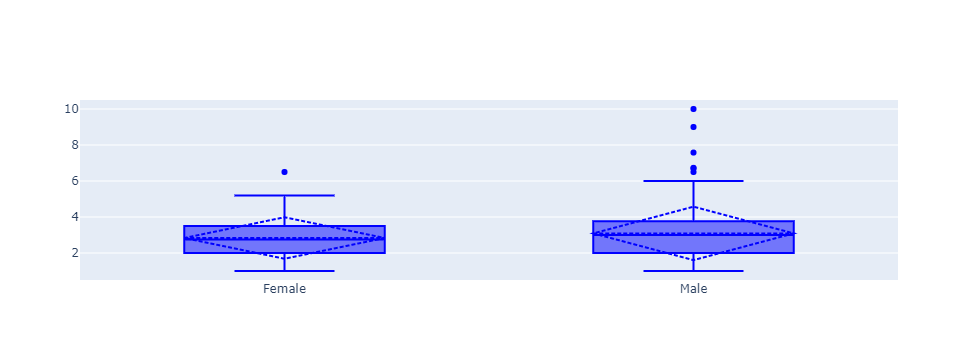

In [58]:
fig = go.Figure()
fig.add_trace(go.Box(x=df_tips.sex, y=df_tips.tip, marker_color='blue',
                     boxmean='sd'))

In [ ]:
df_stocks= px.data.stocks()
fig= go.Figure()
fig.add_trace(go.Box(y=df_stocks.GOOG, boxpoints='all',
                     fillcolor='blue',jitter=0.5,
                     whiskerwidth=0.2))
fig.add_trace(go.Box(y=df_stocks.AAPL, boxpoints='all',
                     fillcolor='red',jitter=0.5,
                     whiskerwidth=0.2))
fig.update_layout(title='Google vs Apple',yaxis=dict(gridcolor='rgb(255,255,255)',
                                                     gridwidth= 3),
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)')

## Heatmap

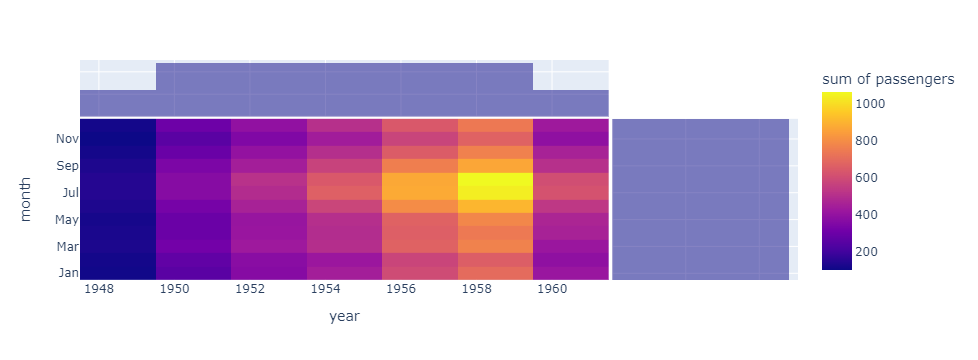

In [59]:
f = sns.load_dataset('flights')
fig = px.density_heatmap(f, x='year', y='month',z= 'passengers',
                        marginal_x= 'histogram',
                        marginal_y='histogram')
fig

# Actividad 1: Creando MAPAS

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/JJTorresDS/ds-data-sources/main/properati_venta_201501.csv')
df.head()

,id,created_on,operation,property_type,country_name,state_name,lat_lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2
0,8ebed78a3c75018c0351ef91a93e1098b03e75c8,2014-11-27,sell,apartment,Argentina,Córdoba,"-31.4121796494,-64.1712732402",62.0,62.0,888.847742
1,8a6dc3c73890f7cce002f8ee6f03bf1d8c04858c,2014-11-19,sell,house,Argentina,Córdoba,"-31.3686142,-64.2264862",240.0,180.0,487.503625
2,7222ebd6e652ea6c0df50c97988b8314a67b6a22,2014-09-03,sell,store,Argentina,Córdoba,"-32.6521427143,-62.3049577995",10000.0,1000.0,160.000000
3,6cf16e0c074d7f0d426c36ada31faba4d6b157f0,2015-01-05,sell,house,Argentina,Córdoba,"-31.3183975,-64.290657",325.0,16250.0,256.004892
4,d0e9ecf25d7215e5b1c29b4a6519f536ee6c0917,2014-12-01,sell,apartment,Argentina,Córdoba,"-31.4017318015,-64.2206747204",78.0,78.0,535.467821


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18891 entries, 0 to 18890
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     18891 non-null  object 
 1   created_on             18891 non-null  object 
 2   operation              18891 non-null  object 
 3   property_type          18891 non-null  object 
 4   country_name           18891 non-null  object 
 5   state_name             18891 non-null  object 
 6   lat_lon                16176 non-null  object 
 7   surface_total_in_m2    10941 non-null  float64
 8   surface_covered_in_m2  12920 non-null  float64
 9   price_usd_per_m2       8541 non-null   float64
dtypes: float64(3), object(7)
memory usage: 1.4+ MB


In [7]:
# Separar la columna lat/lon
df[['lat', 'lon']] = df['lat_lon'].str.split(',', expand=True)  # expand para que cree las columnas. Sin expand se crea en lista
df.head()

,id,created_on,operation,property_type,country_name,state_name,lat_lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,lat,lon
0,8ebed78a3c75018c0351ef91a93e1098b03e75c8,2014-11-27,sell,apartment,Argentina,Córdoba,"-31.4121796494,-64.1712732402",62.0,62.0,888.847742,-31.4121796494,-64.1712732402
1,8a6dc3c73890f7cce002f8ee6f03bf1d8c04858c,2014-11-19,sell,house,Argentina,Córdoba,"-31.3686142,-64.2264862",240.0,180.0,487.503625,-31.3686142,-64.2264862
2,7222ebd6e652ea6c0df50c97988b8314a67b6a22,2014-09-03,sell,store,Argentina,Córdoba,"-32.6521427143,-62.3049577995",10000.0,1000.0,160.000000,-32.6521427143,-62.3049577995
3,6cf16e0c074d7f0d426c36ada31faba4d6b157f0,2015-01-05,sell,house,Argentina,Córdoba,"-31.3183975,-64.290657",325.0,16250.0,256.004892,-31.3183975,-64.290657
4,d0e9ecf25d7215e5b1c29b4a6519f536ee6c0917,2014-12-01,sell,apartment,Argentina,Córdoba,"-31.4017318015,-64.2206747204",78.0,78.0,535.467821,-31.4017318015,-64.2206747204


In [8]:
# convertir a float
df['lat'] = df.lat.astype(float)
df['lon'] = df.lon.astype(float)

In [9]:
df[['lat', 'lon']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18891 entries, 0 to 18890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     16176 non-null  float64
 1   lon     16176 non-null  float64
dtypes: float64(2)
memory usage: 295.3 KB


In [10]:
!pip install folium

In [11]:
import folium  # needed for interactive map
from folium.plugins import HeatMap

In [12]:
df.isnull().sum()

id                           0
created_on                   0
operation                    0
property_type                0
country_name                 0
state_name                   0
lat_lon                   2715
surface_total_in_m2       7950
surface_covered_in_m2     5971
price_usd_per_m2         10350
lat                       2715
lon                       2715
dtype: int64

In [13]:
# eliminar valores nulos
df = df.dropna()
df.isnull().sum()

id                       0
created_on               0
operation                0
property_type            0
country_name             0
state_name               0
lat_lon                  0
surface_total_in_m2      0
surface_covered_in_m2    0
price_usd_per_m2         0
lat                      0
lon                      0
dtype: int64

In [14]:
# Precio máximo
max_amount = float(df['price_usd_per_m2'].max())

# crear mapa
folium_hmap = folium.Map(location=[-40, -120], zoom_start=5, titles="OpenStreetMap")

# Mapa de calor
hm_wide = HeatMap( list(zip(df['lat'], df['lon'], df['price_usd_per_m2'])),  # crea lista de tuplas (lat, long, price)
                    min_opacity=0.8, max_val=max_amount, radius=10, blur=6, max_zoom=15)

# desplegar mapa
folium_hmap.add_child(hm_wide)

C:\Users\alk10\AppData\Local\Temp\ipykernel_9944\2888061125.py:8: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  hm_wide = HeatMap( list(zip(df['lat'], df['lon'], df['price_usd_per_m2'])),  # crea lista de tuplas (lat, long, price)


In [15]:
# Area
max_amount = float(df['price_usd_per_m2'].max())

folium_hmap = folium.Map(location=[-40, -120],
                        zoom_start=5,
                        tiles="OpenStreetMap")

hm_wide = HeatMap( list(zip(df['lat'], df['lon'], df['surface_total_in_m2'])),
                   min_opacity=0.8,
                   max_val=max_amount,
                   radius=10, blur=6, 
                   max_zoom=15, 
                 )

folium_hmap.add_child(hm_wide)

C:\Users\alk10\AppData\Local\Temp\ipykernel_9944\782202487.py:8: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  hm_wide = HeatMap( list(zip(df['lat'], df['lon'], df['surface_total_in_m2'])),


# Actividad 2: Colaborativa

In [ ]:
!pip install gapminder

In [ ]:
from gapminder import gapminder
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [ ]:
gapminder.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [ ]:
gapminder.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [ ]:
import plotly.express as px
df_x= px.data.gapminder().query("year == 2007")
fig=px.bar(df_x, y='pop', x='country', text='pop', color='country')
fig.update_traces(texttemplate= '%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle= -45)
fig